Pour essayer les exemples présents dans ce tutoriel : 

<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=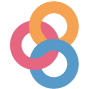)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/02a_pandas_tutorial.ipynb)

Dans ce tutoriel `pandas`, nous allons utiliser:

* Les émissions de gaz à effet de serre estimées au niveau communal par l'ADEME. Le jeu de données est 
disponible sur [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_)
et requêtable directement dans `Python` avec
[cet url](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert)

Le [chapitre suivant](#pandasTP) permettra de mettre en application des éléments
présents dans ce chapitre avec
les données ci-dessus associées à des données de contexte au niveau communal[^1].

[^1]: Idéalement, on utiliserait les données
[disponibles sur le site de l'Insee](https://www.insee.fr/fr/statistiques/3560121)
mais celles-ci nécessitent un peu de travail
de nettoyage qui n'entre pas dans le cadre de ce TP. 
Pour faciliter l'import de données Insee, il est recommandé d'utiliser le package
[`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data) qui simplifie l'accès aux données
de l'Insee disponibles sur le site web [insee.fr](https://www.insee.fr/fr/accueil)
ou via des API. 

{{% panel status="note" title="Note" icon="fa fa-comment" %}}
Le package `pynsee` est relativement jeune et n'est disponible que sur
[Github](https://github.com/InseeFrLab/Py-Insee-Data), pas sur `PyPi`.
Idéalement, on utilise la commande suivante, en ligne de commande, pour l'installer:

```shell
pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
```

Cependant, cela implique que `Jupyter` et `Git` sont capables de communiquer. Si
`Jupyter` ne sait pas où trouver `Git`, il est possible de rencontrer une erreur.

Dans ce cas, il faut télécharger le package compressé et l'installer localement : 


In [ ]:
import requests

url = 'https://github.com/InseeFrLab/Py-Insee-Data/archive/refs/heads/master.zip'
r = requests.get(url)
with open("pynsee.zip" , 'wb') as zipfile:
    zipfile.write(r.content)

!pip install --ignore-installed pynsee.zip
!pip install python-Levenshtein

Si le fait de ne pas avoir de barre de progrès lors du téléchargement
vous trouble, vous pouvez vous rendre à la
[Section Annexe](#annexe) pour découvrir un bout de code
qui effectue les mêmes tâches mais avec des barres de progrès

{{% /panel %}}

:warning: `pandas` offre la possibilité d'importer des données
directement depuis un url. C'est l'option prise dans ce tutoriel.
Si vous préfèrez, pour des
raisons d'accès au réseau ou de performance, importer depuis un poste local,
vous pouvez télécharger les données et changer
les commandes d'import avec le chemin adéquat plutôt que l'url. 

Nous suivrons les conventions habituelles dans l'import des packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee.download

Pour obtenir des résultats reproductibles, on peut fixer la racine du générateur
pseudo-aléatoire. 


In [ ]:
np.random.seed(123)

Au cours de cette démonstration des principales fonctionalités de `pandas`, et
lors du TP

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=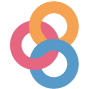)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)

Je recommande de se référer régulièrement aux ressources suivantes:

* L'[aide officielle de pandas](https://pandas.pydata.org/docs/user_guide/index.html).
Notamment, la
[page de comparaison des langages](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html)
est très utile
* La cheatsheet suivante, [issue de ce post](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

![Cheasheet pandas](https://cdn-images-1.medium.com/max/2000/1*YhTbz8b8Svi22wNVvqzneg.jpeg)

# Logique de pandas

L'objet central dans la logique `pandas` est le `DataFrame`.
Il s'agit d'une structure particulière de données
à deux dimensions, structurées en alignant des lignes et colonnes. Les colonnes
peuvent être de type différent.

Un DataFrame est composé des éléments suivants:

* l'indice de la ligne ;
* le nom de la colonne ;
* la valeur de la donnée ;

Structuration d'un DataFrame pandas, emprunté à <https://medium.com/epfl-extension-school/selecting-data-from-a-pandas-dataframe-53917dc39953>:

![](https://miro.medium.com/max/700/1*6p6nF4_5XpHgcrYRrLYVAw.png)

Le concept de *tidy* data, popularisé par Hadley Wickham via ses packages `R`,
est parfaitement pertinent pour décrire la structure d'un DataFrame pandas.
Les trois règles sont les suivantes:

* Chaque variable possède sa propre colonne
* Chaque observation possède sa propre ligne
* Une valeur, matérialisant la valeur d'une observation d'une variable,
se trouve sur une unique cellule.

![Concept de tidy data (emprunté à H. Wickham)](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

:warning: Les DataFrames sont assez rapides en Python[^1] et permettent de traiter en local de manière efficace des tables de
données comportant plusieurs millions d'observations (en fonction de la configuration de l'ordinateur)
et dont la volumétrie peut être conséquente (plusieurs centaines
de Mo). Néanmoins,  passé un certain seuil, qui dépend de la puissance de la machine mais aussi de la complexité
de l'opération effectuée, le DataFrame `pandas` peut montrer certaines limites. Dans ce cas, il existe différentes
solutions: `dask` (dataframe aux opérations parallélisés), `SQL` (notamment postgres), `spark` (solution big data)

[^1]:  En `R`, les deux formes de dataframes qui se sont imposées récemment sont les `tibbles` (package `dplyr`)
et les `data.tables` (package `data.table`). `dplyr` reprend la syntaxe SQL de manière relativement
transparente ce qui rend la syntaxe très proche de celle de `pandas`. Cependant,
alors que `dplyr` supporte très mal les données dont la volumétrie dépasse 1Go, `pandas` s'en
accomode bien. Les performances de `pandas` sont plus proches de celles de `data.table`, qui est
connu pour être une approche efficace avec des données de taille importante.

Concernant la syntaxe, une partie des commandes python est inspirée par la logique SQL. On retrouvera ainsi
des instructions relativement transparentes.

Il est vivement recommandé, avant de se lancer dans l'écriture d'une
fonction, de se poser la question de son implémentation native dans `numpy`, `pandas`, etc.
En particulier, la plupart du temps, s'il existe une solution implémentée dans une librairie, il convient
de l'utiliser.

# Les Series

En fait, un DataFrame est une collection d'objets appelés `pandas.Series`.
Ces `Series` sont des objets d'une dimension qui sont des extensions des
array-unidimensionnels `numpy`. En particulier, pour faciliter le traitement
de données catégorielles ou temporelles, des types de variables
supplémentaires sont disponibles dans `pandas` par rapport à
`numpy` (`categorical`, `datetime64` et `timedelta64`). Ces
types sont associés à des méthodes optimisées pour faciliter le traitement
de ces données.

Il ne faut pas négliger l'attribut `dtype` d'un objet
`pandas.Series` car cela a une influence déterminante sur les méthodes
et fonctions pouvant être utilisées (on ne fait pas les mêmes opérations
sur une donnée temporelle et une donnée catégorielle) et le volume en
mémoire d'une variable (le type de la variable détermine le volume
d'information stocké pour chaque élément ; être trop précis est parfois
néfaste).

Il existe plusieurs types possibles pour un `pandas.Series`.
Le type `object` correspond aux types Python `str` ou `mixed`.
Il existe un type particulier pour les variables dont le nombre de valeurs
est une liste finie et relativement courte, le type `category`.
Il faut bien examiner les types de son DataFrame, et convertir éventuellement
les types lors de l'étape de `data cleaning`.

### Indexation

La différence essentielle entre une `Series` et un objet `numpy` est l'indexation.
Dans `numpy`,
l'indexation est implicite ; elle permet d'accéder à une donnée (celle à
l'index situé à la position *i*).
Avec une `Series`, on peut bien-sûr utiliser un indice de position mais on peut
surtout faire appel à des indices plus explicites.
Par exemple,


In [ ]:
taille = pd.Series(
    [1.,1.5,1],
    index = ['chat', 'chien', 'koala']
)

taille.head()

```
## chat     1.0
## chien    1.5
## koala    1.0
## dtype: float64
```

Cette indexation permet d'accéder à des valeurs de la `Series`
via une valeur de l'indice. Par
exemple, `taille['koala']`:


In [ ]:
taille['koala']

```
## 1.0
```

L'existence d'indice rend le *subsetting* particulièrement aisé, ce que vous
pouvez expérimenter dans les TP

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=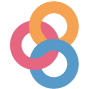)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)


Pour transformer un objet `pandas.Series` en array `numpy`,
on utilise la méthode `values`. Par exemple, `taille.values`:


In [ ]:
taille.values

```
## array([1. , 1.5, 1. ])
```

Un avantage des `Series` par rapport à un *array* `numpy` est que
les opérations sur les `Series` alignent
automatiquement les données à partir des labels.
Avec des `Series` labélisées, il n'est ainsi pas nécessaire
de se poser la question de l'ordre des lignes.
L'exemple dans la partie suivante permettra de s'en assurer.

### Valeurs manquantes

Par défaut, les valeurs manquantes sont affichées `NaN` et sont de type `np.nan` (pour
les valeurs temporelles, i.e. de type `datatime64`, les valeurs manquantes sont
`NaT`).

<!-----
{{< panel status="danger" title="warning" icon="fa fa-exclamation-triangle" >}}
:warning: Il faut **vraiment faire attention** aux valeurs manquantes, notamment lorsqu'on utilise les
méthodes de statistiques descriptives présentées ultérieurement. Les règles sont les suivantes:

* Dans les opérations de somme ou de moyenne d'une valeur, les valeurs manquantes
 sont traitées comme des `0`. C'est un comportement par défaut différent
 de celui de `R` où les opérations `sum`, `mean`, etc. renvoient un `NA`.
 __C'est très dangereux pour la moyenne__: la valeur n'est pas ignorée, elle est traitée comme un
 `0` (ce qui biaise la moyenne). Le paramètre crucial à changer pour
 ignorer la valeur (et non la remplacer par 0!) est `skipna` (cet argument
 permettant un comportement équivalent à `na.rm = TRUE` en `R`).
 Pour plus de détails, `help(pandas.Series.sum)`.
* Les méthodes `cumsum` et `cumprod` ignorent les `NA` par défaut mais les préservent dans le vecteur de sortie.


In [ ]:
#x = [np.nan, np.arange(3)]
# Pour avoir un exemple comparable à l'exemple R ci-dessous
x = np.array([np.nan,0,1,2])
print(x)

```
## [nan  0.  1.  2.]
```

In [ ]:
np.mean(x)

```
## nan
```


```r
x <- c(NA, 1:3)
mean(x, na.rm = TRUE)
```

```
## [1] 2
```

{{< /panel >}}

En revanche, ----->
On a un comportement cohérent d'agrégation lorsqu'on combine deux `DataFrames` (ou deux colonnes).
Par exemple,



In [ ]:
x = pd.DataFrame(
    {'prix': np.random.uniform(size = 5),
     'quantite': [i+1 for i in range(5)]
    },
    index = ['yaourt','pates','riz','tomates','gateaux']
)
x

```
##              prix  quantite
## yaourt   0.696469         1
## pates    0.286139         2
## riz      0.226851         3
## tomates  0.551315         4
## gateaux  0.719469         5
```


In [ ]:
y = pd.DataFrame(
    {'prix': [np.nan, 0, 1, 2, 3],
     'quantite': [i+1 for i in range(5)]
    },
    index = ['tomates','yaourt','gateaux','pates','riz']
)
y

```
##          prix  quantite
## tomates   NaN         1
## yaourt    0.0         2
## gateaux   1.0         3
## pates     2.0         4
## riz       3.0         5
```


In [ ]:
x + y

```
##              prix  quantite
## gateaux  1.719469         8
## pates    2.286139         6
## riz      3.226851         8
## tomates       NaN         5
## yaourt   0.696469         3
```

donne bien une valeur manquante pour la ligne `tomates`. Au passage, on peut remarquer que l'agrégation
a tenu compte des index.

Il est possible de supprimer les valeurs manquantes grâce à `dropna()`.
Cette méthode va supprimer toutes les lignes où il y a au moins une valeur manquante.
Il est aussi possible de supprimer seulement les colonnes où il y a des valeurs manquantes
dans un DataFrame avec `dropna()` avec le paramètre `axis=1` (par défaut égal à 0).

Il est également possible de remplir les valeurs manquantes grâce à la méthode `fillna()`.

# Le DataFrame pandas

Le `DataFrame` est l'objet central de la librairie `pandas`.
Il s'agit d'une collection de `pandas.Series` (colonnes) alignées par les index.
Les types des variables peuvent différer.

Un DataFrame non-indexé a la structure suivante:

<!-----
Exo 1
Aller dans la doc pandas et trouver comment créer le dataFrame pandas suivant
------>

```
##    index  taille  poids
## 0   chat     1.0    3.0
## 1  chien     1.5    5.0
## 2  koala     1.0    2.5
```

Alors que le même dataframe indexé aura la structure suivante:

```
##        taille  poids
## chat      1.0    3.0
## chien     1.5    5.0
## koala     1.0    2.5
```

## Les attributs et méthodes utiles

Pour présenter les méthodes les plus pratiques pour l'analyse de données,
on peut partir de l'exemple des consommations de CO2 communales issues
des données de l'Ademe. Cette base de données est exploitée plus intensément
dans le TP

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=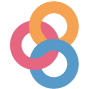)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)



In [ ]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df

```
##       INSEE commune                  Commune  ...       Routier     Tertiaire
## 0             01001  L'ABERGEMENT-CLEMENCIAT  ...    793.156501    367.036172
## 1             01002    L'ABERGEMENT-DE-VAREY  ...    348.997893    112.934207
## 2             01004        AMBERIEU-EN-BUGEY  ...  15642.420310  10732.376930
## 3             01005      AMBERIEUX-EN-DOMBES  ...   1756.341319    782.404357
## 4             01006                  AMBLEON  ...    398.786800     51.681756
## ...             ...                      ...  ...           ...           ...
## 35793         95676       VILLERS-EN-ARTHIES  ...    309.627908    235.439109
## 35794         95678            VILLIERS-ADAM  ...  18759.370070    403.404815
## 35795         95680          VILLIERS-LE-BEL  ...  12217.122400  13849.512000
## 35796         95682          VILLIERS-LE-SEC  ...   4663.232127     85.657725
## 35797         95690      WY-DIT-JOLI-VILLAGE  ...    504.400972    147.867245
## 
## [35798 rows x 12 columns]
```

Dans un processus de production, où normalement on connait les types des variables du DataFrame qu'on va importer,
il convient de préciser les types avec lesquels on souhaite importer les données
(argument `dtype`, sous la forme d'un dictionnaire). Cela est particulièrement important lorsqu'on désire utiliser une colonne comme une variable textuelle mais qu'elle comporte des attributs proches d'un nombre qui vont inciter `pandas` à l'importer sous forme de variable numérique.

Par exemple, une colonne `[00001,00002,...] ` risque d'être importée comme une variable numérique, ignorant l'information des premiers 0 (qui peuvent pourtant la distinguer de la séquence 1, 2, etc.). Pour s'assurer que `pandas` importe sous forme textuelle la variable, on peut utiliser `dtype = {"code": "str"}`
Sinon, on peut importer le csv, et modifier les types avec `astype()`.
Avec `astype`, on peut gérer les erreurs de conversion avec le paramètre `errors`.

L'affichage des DataFrames est très ergonomique. On obtiendrait le même *output*
avec `display(df)`[^2]. Les premières et dernières lignes s'affichent
automatiquement. Autrement, on peut aussi faire:

* `head` qui permet, comme son
nom l'indique, de n'afficher que les premières lignes ;
* `tail` qui permet, comme son
nom l'indique, de n'afficher que les dernières lignes
* `sample` qui permet d'afficher un échantillon aléatoire de *n* lignes.
Cette méthode propose de nombreuses options

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=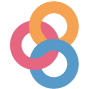)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)

[^2]: Il est préférable d'utiliser la fonction `display` (ou tout simplement
taper le nom du DataFrame qu'utiliser la fonction `print`). Le
`display` des objets `pandas` est assez esthétique, contrairement à `print`
qui renvoie du texte brut.

{{% panel status="danger" title="warning" icon="fa fa-exclamation-triangle" %}}
Il faut faire attention au `display` et aux
commandes qui révèlent des données (`head`, `tail`, etc.)
dans un notebook ou un markdown qui exploite
des données confidentielles lorsqu'on utilise `git`. En effet, on peut se
retrouver à partager des données, involontairement, dans l'historique
`git`. Avec un `R markdown`, il suffit d'ajouter les sorties au fichier
`gitignore` (par exemple avec une balise de type `*.html`). Avec un
notebook `jupyter`, la démarche est plus compliquée car les fichiers
`.ipynb` intègrent dans le même document, texte, sorties et mise en forme.
Techniquement, il est possible d'appliquer des filtres avec `git`
(voir
[ici](http://timstaley.co.uk/posts/making-git-and-jupyter-notebooks-play-nice/))
mais c'est une démarche très complexe
{{% /panel %}}

On pourra alors préférer convertir systématiquement les `.ipynb` en `.py` grâce
à `jupytext` (`jupytext --to py nom_du_notebook.ipynb`) et mettre l'extension `*.ipynb`
dans le `.gitignore` de son projet git.

### Dimensions et structure du DataFrame

Les premières méthodes utiles permettent d'afficher quelques
attributs d'un DataFrame.


In [ ]:
df.axes

```
## [RangeIndex(start=0, stop=35798, step=1), Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
##        'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
##        'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
##        'Tertiaire'],
##       dtype='object')]
```

In [ ]:
df.columns

```
## Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
##        'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
##        'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
##        'Tertiaire'],
##       dtype='object')
```

In [ ]:
df.index

```
## RangeIndex(start=0, stop=35798, step=1)
```

Pour connaître les dimensions d'un DataFrame, on peut utiliser quelques méthodes
pratiques:



In [ ]:
df.ndim

```
## 2
```

In [ ]:
df.shape

```
## (35798, 12)
```

In [ ]:
df.size

```
## 429576
```

Pour déterminer le nombre de valeurs uniques d'une variable, plutôt que chercher à écrire soi-même une fonction,
on utilise la
méthode `nunique`. Par exemple,


In [ ]:
df['Commune'].nunique()

```
## 33338
```

Voici un premier résumé des méthodes `pandas` utiles, et un comparatif avec `R`

| Opération                     | pandas       | dplyr (`R`)    | data.table (`R`)           |
|-------------------------------|--------------|----------------|----------------------------|
| Récupérer le nom des colonnes | `df.columns` | `colnames(df)` | `colnames(df)`             |
| Récupérer les indices[^3]     | `df.index`   |                |`unique(df[,get(key(df))])` |
| Récupérer les dimensions      | `df.shape` | `c(nrow(df), ncol(df))` | `c(nrow(df), ncol(df))` |
| Récupérer le nombre de valeurs uniques d'une variable | `df['myvar'].nunique()` | `df %>%  summarise(distinct(myvar))` | `df[,uniqueN(myvar)]` |

[^3]: Le principe d'indice n'existe pas dans `dplyr`. Ce qui s'approche le plus des indices, au sens de
`pandas`, sont les *clés* en `data.table`.

### Statistiques agrégées

`pandas` propose une série de méthodes pour faire des statistiques
agrégées de manière efficace.

On peut, par exemple, appliquer des méthodes pour compter le nombre de lignes,
faire une moyenne ou une somme de l'ensemble des lignes


In [ ]:
df.count()

```
## INSEE commune                      35798
## Commune                            35798
## Agriculture                        35736
## Autres transports                   9979
## Autres transports international     2891
## CO2 biomasse hors-total            35798
## Déchets                            35792
## Energie                            34490
## Industrie hors-énergie             34490
## Résidentiel                        35792
## Routier                            35778
## Tertiaire                          35798
## dtype: int64
```

In [ ]:
df.mean()

```
## Agriculture                        2459.975760
## Autres transports                   654.919940
## Autres transports international    7692.344960
## CO2 biomasse hors-total            1774.381550
## Déchets                             410.806329
## Energie                             662.569846
## Industrie hors-énergie             2423.127789
## Résidentiel                        1783.677872
## Routier                            3535.501245
## Tertiaire                          1105.165915
## dtype: float64
## 
## <string>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
```

In [ ]:
df.sum()

```
## INSEE commune                      0100101002010040100501006010070100801009010100...
## Commune                            L'ABERGEMENT-CLEMENCIATL'ABERGEMENT-DE-VAREYAM...
## Agriculture                                                          87909693.748185
## Autres transports                                                     6535446.082616
## Autres transports international                                      22238569.279024
## CO2 biomasse hors-total                                              63519310.715902
## Déchets                                                              14703580.140421
## Energie                                                              22852033.998225
## Industrie hors-énergie                                               83573677.443527
## Résidentiel                                                          63841398.384566
## Routier                                                             126493163.530568
## Tertiaire                                                            39562729.439236
## dtype: object
```

In [ ]:
df.nunique()

```
## INSEE commune                      35798
## Commune                            33338
## Agriculture                        35576
## Autres transports                   9963
## Autres transports international     2883
## CO2 biomasse hors-total            35798
## Déchets                            11016
## Energie                             1453
## Industrie hors-énergie              1889
## Résidentiel                        35791
## Routier                            35749
## Tertiaire                           8663
## dtype: int64
```

In [ ]:
df.quantile(q = [0.1,0.25,0.5,0.75,0.9])

```
##       Agriculture  Autres transports  ...      Routier    Tertiaire
## 0.10   382.620882          25.034578  ...   199.765410    49.289082
## 0.25   797.682631          52.560412  ...   419.700460    94.749885
## 0.50  1559.381286         106.795928  ...  1070.895593   216.297718
## 0.75  3007.883903         237.341501  ...  3098.612157   576.155869
## 0.90  5442.727470         528.349529  ...  8151.047248  1897.732565
## 
## [5 rows x 10 columns]
```

Il faut toujours regarder les options de ces fonctions en termes de valeurs manquantes, car
ces options sont déterminantes dans le résultat obtenu.

Les exercices de TD visent à démontrer l'intérêt de ces méthodes dans quelques cas précis.

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=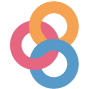)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)

<!---
Comme indiqué précédemment, il faut faire attention aux valeurs manquantes qui,
par défaut, sont traitées comme des 0.
Il est ainsi recommandé de systématiquement
ajouter l'argument skipna, par exemple,


In [ ]:
df.mean(skipna=True)

```
## Agriculture                        2459.975760
## Autres transports                   654.919940
## Autres transports international    7692.344960
## CO2 biomasse hors-total            1774.381550
## Déchets                             410.806329
## Energie                             662.569846
## Industrie hors-énergie             2423.127789
## Résidentiel                        1783.677872
## Routier                            3535.501245
## Tertiaire                          1105.165915
## dtype: float64
## 
## <string>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
```

----->

Le tableau suivant récapitule le code équivalent pour avoir des
statistiques sur toutes les colonnes d'un dataframe en `R`.

| Opération                     | pandas       | dplyr (`R`)    | data.table (`R`)           |
|-------------------------------|--------------|----------------|----------------------------|
| Nombre de valeurs non manquantes | `df.count()`   | `df %>% summarise_each(funs(sum(!is.na(.))))` | `df[, lapply(.SD, function(x) sum(!is.na(x)))]`
| Moyenne de toutes les variables | `df.mean()` | `df %>% summarise_each(funs(mean((., na.rm = TRUE))))` | `df[,lapply(.SD, function(x) mean(x, na.rm = TRUE))]`| TO BE CONTINUED |

La méthode `describe` permet de sortir un tableau de statistiques
agrégées:


In [ ]:
df.describe()

```
##         Agriculture  Autres transports  ...        Routier      Tertiaire
## count  35736.000000        9979.000000  ...   35778.000000   35798.000000
## mean    2459.975760         654.919940  ...    3535.501245    1105.165915
## std     2926.957701        9232.816833  ...    9663.156628    5164.182507
## min        0.003432           0.000204  ...       0.555092       0.000000
## 25%      797.682631          52.560412  ...     419.700460      94.749885
## 50%     1559.381286         106.795928  ...    1070.895593     216.297718
## 75%     3007.883903         237.341501  ...    3098.612157     576.155869
## max    98949.317760      513140.971700  ...  586054.672800  288175.400100
## 
## [8 rows x 10 columns]
```

### Méthodes relatives aux valeurs manquantes

Les méthodes relatives aux valeurs manquantes peuvent être mobilisées
en conjonction des méthodes de statistiques agrégées. C'est utiles lorsqu'on
désire obtenir une idée de la part de valeurs manquantes dans un jeu de
données
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=%C2%ABpython-datascientist%C2%BB&resources.requests.memory=%C2%AB4Gi%C2%BB)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/pandas_intro/static/notebooks/numpy.ipynb)
 ([ou depuis github](https://github.com/linogaliana/python-datascientist/blob/master/content/01_data/02_pandas_tp.ipynb))

In [ ]:
df.isnull().sum()

On trouvera aussi la référence à `isna()` qui est la même méthode que `isnull()`.

# Graphiques rapides

Les méthodes par défaut de graphique
(approfondies dans la [partie visualisation](#visualisation))
sont pratiques pour
produire rapidement un graphique, notamment après des opérations
complexes de maniement de données.

En effet, on peut appliquer la méthode `plot()` directement à une `pandas.Series`:


In [ ]:
df['Déchets'].plot()
df['Déchets'].hist()
df['Déchets'].plot(kind = 'hist', logy = True)

{{<figure src="../course/manipulation/plot_base.png" >}}
{{<figure src="../course/manipulation/plot_hist.png" >}}
{{<figure src="../course/manipulation/plot_hist_log.png" >}}

La sortie est un objet `matplotlib`. La *customisation* de ces
figures est ainsi
possible (et même désirable car les graphiques `matplotlib`
sont, par défaut, assez rudimentaires), nous en verrons quelques exemples.

# Accéder à des éléments d'un DataFrame

## Sélectionner des colonnes

En SQL, effectuer des opérations sur les colonnes se fait avec la commande
`SELECT`. Avec `pandas`,
pour accéder à une colonne dans son ensemble on peut
utiliser plusieurs approches:

* `dataframe.variable`, par exemple `df.Energie`.
Cette méthode requiert néanmoins d'avoir des
noms de colonnes sans espace.
* `dataframe[['variable']]` pour renvoyer la variable sous
forme de `DataFrame` ou dataframe['variable'] pour
la renvoyer sous forme de `Series`. Par exemple, `df[['Autres transports']]`
ou `df['Autres transports']`. C'est une manière préférable de procéder.

## Accéder à des lignes

Pour accéder à une ou plusieurs valeurs d'un `DataFrame`,
il existe deux manières conseillées de procéder, selon la
forme des indices de lignes ou colonnes utilisés:

* `df.loc`: use labels
* `df.iloc`: use indices

Les bouts de code utilisant la structure `df.ix`
sont à bannir car la fonction est *deprecated* et peut
ainsi disparaître à tout moment.

`iloc` va se référer à l'indexation de 0 à *N* où *N* est égal à `df.shape[0]` d'un
`pandas.DataFrame`. `loc` va se référer aux valeurs de l'index
de `df`.

Par exemple, si j'ai un `pandas.DataFrame` `df`:
```
       year  sale
month
1      2012    55
4      2014    40
7      2013    84
10     2014    31
```
Alors `df.loc[1, :]` donnera la première ligne de `df` (ligne où l'indice `month` est égal à 1) tandis que
`df.iloc[1, :]` donnera la deuxième ligne (puisque l'indexation en `Python` commence à 0).

<!----
data.loc[1:3]
data.loc[(data.age >= 20), ['section', 'city']]

data.iloc[[0,2]]
data.iloc[[0,2],[1,3]]
data.iloc[1:3,2:4]

data.loc[(data.age >= 12), ['section']]
------>

# Principales manipulation de données

L'objectif du [TP pandas](#pandasTP) est de se familiariser plus avec ces
commandes à travers l'exemple des données des émissions de C02.

Les opérations les plus fréquentes en SQL sont résumées par le tableau suivant.
Il est utile de les connaître (beaucoup de syntaxes de maniement de données
reprennent ces termes) car, d'une
manière ou d'une autre, elles couvrent la plupart
des usages de manipulation des données

| Opération | SQL | pandas | dplyr (`R`) | data.table (`R`) |
|-----|-----------|--------|-------------|------------------|
| Sélectionner des variables par leur nom | `SELECT` | `df[['Autres transports','Energie']]` | `df %>% select(Autres transports, Energie)` | `df[, c('Autres transports','Energie')]` |
| Sélectionner des observations selon une ou plusieurs conditions; | `FILTER` | `df[df['Agriculture']>2000]` | `df %>% filter(Agriculture>2000)` | `df[Agriculture>2000]` |
| Trier la table selon une ou plusieurs variables | `SORT BY` | `df.sort_values(['Commune','Agriculture'])` | `df %>% arrange(Commune, Agriculture)` | `df[order(Commune, Agriculture)]` |
| Ajouter des variables qui sont fonction d’autres variables; | `SELECT *, LOG(Agriculture) AS x FROM df` | `df['x'] = np.log(df['Agriculture'])`  |  `df %>% mutate(x = log(Agriculture))` | `df[,x := log(Agriculture)]` |
| Effectuer une opération par groupe | `GROUP BY` | `df.groupby('Commune').mean()` | `df %>% group_by(Commune) %>% summarise(m = mean)` | `df[,mean(Commune), by = Commune]` |
| Joindre deux bases de données (*inner join*) | `SELECT * FROM table1 INNER JOIN table2 ON table1.id = table2.x` | `table1.merge(table2, left_on = 'id', right_on = 'x')` | `table1 %>% inner_join(table2, by = c('id'='x'))` | `merge(table1, table2, by.x = 'id', by.y = 'x')` |

## Opérations sur les colonnes: select, mutate, drop

Les DataFrames pandas sont des objets *mutables* en langage `python`,
c'est-à-dire qu'il est possible de faire évoluer le DataFrame au grès
des opérations. L'opération la plus classique consiste à ajouter ou retirer
des variables à la table de données.

{{% panel status="danger" title="warning" icon="fa fa-exclamation-triangle" %}}
Attention au comportement de `pandas` lorsqu'on crée une duplication
d'un DataFrame. Par défaut, `pandas` effectue une copie par référence. Dans ce
cas, les deux objets (la copie et l'objet copié) restent reliés. Les colonnes
crées sur l'un vont être répercutées sur l'autre. Ce comportement permet de
limiter l'inflation en mémoire de `python`. En faisant ça, le deuxième
objet prend le même espace mémoire que le premier. Le package `data.table`
en  `R` adopte le même comportement, contrairement à `dplyr`.

Cela peut amener à quelques surprises si ce comportement d'optimisation
n'est pas anticipé. Si vous voulez, par sécurité, conserver intact le
premier DataFrame, faites appel à une copie profonde (*deep copy*) en
utilisant la méthode `copy`:


In [ ]:
df_new = df.copy()

Attention toutefois, cela a un coût mémoire. Avec des données volumineuses, c'est une pratique à utiliser avec précaution

{{% /panel %}}

La manière la plus simple d'opérer pour ajouter des colonnes est
d'utiliser la réassignation. Par exemple, pour créer une variable
`x` qui est le `log` de la
variable `Agriculture`:


In [ ]:
df_new['x'] = np.log(df_new['Agriculture'])

Il est possible d'appliquer cette approche sur plusieurs colonnes. Un des
intérêts de cette approche est qu'elle permet de recycler le nom de colonnes.


In [ ]:
vars = ['Agriculture', 'Déchets', 'Energie']

df_new[[v + "_log" for v in vars]] = np.log(df_new[vars])
df_new

```
##       INSEE commune                  Commune  ...  Déchets_log  Energie_log
## 0             01001  L'ABERGEMENT-CLEMENCIAT  ...     4.619374     0.856353
## 1             01002    L'ABERGEMENT-DE-VAREY  ...     4.946455     0.856353
## 2             01004        AMBERIEU-EN-BUGEY  ...     8.578159     6.906086
## 3             01005      AMBERIEUX-EN-DOMBES  ...     5.376285     4.545232
## 4             01006                  AMBLEON  ...     3.879532          NaN
## ...             ...                      ...  ...          ...          ...
## 35793         95676       VILLERS-EN-ARTHIES  ...     4.175366     2.465791
## 35794         95678            VILLIERS-ADAM  ...     4.713854     0.856353
## 35795         95680          VILLIERS-LE-BEL  ...     5.418865     6.281303
## 35796         95682          VILLIERS-LE-SEC  ...     4.691070     0.856353
## 35797         95690      WY-DIT-JOLI-VILLAGE  ...     4.582194     1.549500
## 
## [35798 rows x 16 columns]
```

Il est également possible d'utiliser la méthode `assign`. Pour des opérations
vectorisées, comme le sont les opérateurs de `numpy`, cela n'a pas d'intérêt.

Cela permet notamment d'enchainer les opérations sur un même `DataFrame` (notamment grâce au `pipe` que
nous verrons plus loin).
Cette approche utilise généralement
des *lambda functions*. Par exemple le code précédent (celui concernant une
 seule variable) prendrait la forme:



In [ ]:
df_new.assign(Energie_log = lambda x: np.log(x['Energie']))

```
##       INSEE commune                  Commune  ...  Déchets_log  Energie_log
## 0             01001  L'ABERGEMENT-CLEMENCIAT  ...     4.619374     0.856353
## 1             01002    L'ABERGEMENT-DE-VAREY  ...     4.946455     0.856353
## 2             01004        AMBERIEU-EN-BUGEY  ...     8.578159     6.906086
## 3             01005      AMBERIEUX-EN-DOMBES  ...     5.376285     4.545232
## 4             01006                  AMBLEON  ...     3.879532          NaN
## ...             ...                      ...  ...          ...          ...
## 35793         95676       VILLERS-EN-ARTHIES  ...     4.175366     2.465791
## 35794         95678            VILLIERS-ADAM  ...     4.713854     0.856353
## 35795         95680          VILLIERS-LE-BEL  ...     5.418865     6.281303
## 35796         95682          VILLIERS-LE-SEC  ...     4.691070     0.856353
## 35797         95690      WY-DIT-JOLI-VILLAGE  ...     4.582194     1.549500
## 
## [35798 rows x 16 columns]
```

Dans les méthodes suivantes, il est possible de modifier le `pandas.DataFrame`
*en place*, c'est à dire en ne le réassignant pas, avec le paramètre `inplace = True`.
Par défaut, `inplace` est égal à False et pour modifier le `pandas.DataFrame`,
il convient de le réassigner.

On peut facilement renommer des variables avec la méthode `rename` qui
fonctionne bien avec des dictionnaires (pour renommer des colonnes il faut
préciser le paramètre `axis = 1`):


In [ ]:
df_new = df_new.rename({"Energie": "eneg", "Agriculture": "agr"}, axis=1)

Enfin, pour effacer des colonnes, on utilise la méthode `drop` avec l'argument
`columns`:


In [ ]:
df_new = df_new.drop(columns = ["eneg", "agr"])

## Réordonner

La méthode `sort_values` permet de réordonner un `DataFrame`. Par exemple,
si on désire classer par ordre décroissant de consommation de CO2 du secteur
résidentiel, on fera


In [ ]:
df = df.sort_values("Résidentiel", ascending = False)

Ainsi, en une ligne de code, on identifie les villes où le secteur
résidentiel consomme le plus.

## Filtrer

L'opération de sélection de lignes s'appelle `FILTER` en SQL. Elle s'utilise
en fonction d'une condition logique (clause `WHERE`). On sélectionne les
données sur une condition logique. Il existe plusieurs méthodes en `pandas`.

La plus simple est d'utiliser les *boolean mask*, déjà vus dans le chapitre
[`numpy`](#numpy)

Par exemple, pour sélectionner les communes dans les Hauts-de-Seine, on
peut utiliser le résultat de la méthode `str.startswith` (qui renvoie
`True` ou `False`) directement dans les crochets:


In [ ]:
df[df['INSEE commune'].str.startswith("92")].head(2)

```
##       INSEE commune               Commune  ...      Routier    Tertiaire
## 35494         92012  BOULOGNE-BILLANCOURT  ...  64985.28090  60349.10948
## 35501         92025              COLOMBES  ...  52070.92794  41526.60087
## 
## [2 rows x 12 columns]
```

Pour remplacer des valeurs spécifiques, on utilise la méthode `where` ou une
réassignation couplée à la méthode précédente.

Par exemple, pour assigner des valeurs manquantes aux départements du 92,
on peut faire cela


In [ ]:
df_copy = df.copy()
df_copy = df_copy.where(~df['INSEE commune'].str.startswith("92"))

et vérifier les résultats:


In [ ]:
df_copy[df['INSEE commune'].str.startswith("92")].head(2)

```
##       INSEE commune Commune  Agriculture  ...  Résidentiel  Routier  Tertiaire
## 35494           NaN     NaN          NaN  ...          NaN      NaN        NaN
## 35501           NaN     NaN          NaN  ...          NaN      NaN        NaN
## 
## [2 rows x 12 columns]
```

In [ ]:
df_copy[~df['INSEE commune'].str.startswith("92")].head(2)

```
##       INSEE commune   Commune  ...      Routier    Tertiaire
## 12167         31555  TOULOUSE  ...  586054.6728  288175.4001
## 16774         44109    NANTES  ...  221068.6327  173447.5828
## 
## [2 rows x 12 columns]
```

ou alors utiliser une réassignation plus classique:


In [ ]:
df_copy = df.copy()
df_copy[df_copy['INSEE commune'].str.startswith("92")] = np.nan

Il est conseillé de filtrer avec `loc` en utilisant un masque.
En effet, contrairement à `df[mask]`, `df.loc[mask, :]` permet d'indiquer clairement
à Python que l'on souhaite appliquer le masque aux labels de l'index.
Ce n'est pas le cas avec `df[mask]`. D'ailleurs, lorsqu'on utilise la syntaxe `df[mask]`, `pandas` renvoie généralement un *warning*

## Opérations par groupe

En SQL, il est très simple de découper des données pour
effectuer des opérations sur des blocs cohérents et recollecter des résultats
dans la dimension appropriée.
La logique sous-jacente est celle du *split-apply-combine* qui est repris
par les langages de manipulation de données, auxquels `pandas`
[ne fait pas exception](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

L'image suivante, issue de
[ce site](https://unlhcc.github.io/r-novice-gapminder/16-plyr/)
représente bien la manière dont fonctionne l'approche
`split`-`apply`-`combine`

![Split-apply-combine](https://unlhcc.github.io/r-novice-gapminder/fig/12-plyr-fig1.png)

Ce [tutoriel](https://realpython.com/pandas-groupby/) sur le sujet
est particulièrement utile.

Pour donner quelques exemples, on peut créer une variable départementale qui
servira de critère de groupe.


In [ ]:
df['dep'] = df['INSEE commune'].str[:2]

En `pandas`, on utilise `groupby` pour découper les données selon un ou
plusieurs axes. Techniquement, cette opération consiste à créer une association
entre des labels (valeurs des variables de groupe) et des
observations.

Par exemple, pour compter le nombre de communes par département en SQL, on
utiliserait la requête suivante:

In [ ]:
%%sql
SELECT dep, count(INSEE commune)
FROM df
GROUP BY dep;

Ce qui, en `pandas`, donne:


In [ ]:
df.groupby('dep')["INSEE commune"].count()

```
## dep
## 01    410
## 02    805
## 03    318
## 04    199
## 05    168
##      ... 
## 91    196
## 92     36
## 93     40
## 94     47
## 95    185
## Name: INSEE commune, Length: 96, dtype: int64
```

La syntaxe est quasiment transparente. On peut bien-sûr effectuer des opérations
par groupe sur plusieurs colonnes. Par exemple,


In [ ]:
df.groupby('dep').mean()

```
##      Agriculture  Autres transports  ...       Routier     Tertiaire
## dep                                  ...                            
## 01   1974.535382         100.307344  ...   3988.658995   1021.089078
## 02   1585.417729         202.878748  ...   1722.240298    403.744266
## 03   6132.029417         240.076499  ...   3662.773062    705.937016
## 04   1825.455590         177.321816  ...   1962.654370    493.609329
## 05   1847.508592         141.272767  ...   2071.010178    463.604908
## ..           ...                ...  ...           ...           ...
## 91    802.793163       10114.998156  ...  10578.452789   3866.757199
## 92      8.309835         362.964554  ...  33289.456629  23222.587594
## 93     50.461775        1753.443710  ...  35818.236459  21575.444795
## 94     48.072971        5474.808841  ...  24881.531613  16247.876321
## 95    609.172047         682.143912  ...   8325.948748   4014.985843
## 
## [96 rows x 10 columns]
```

A noter que la variable de groupe, ici `dep`, devient, par défaut, l'index
du DataFrame de sortie. Si on avait utilisé plusieurs variables de groupe,
on obtiendrait un objet multi-indexé. Sur la gestion des `multiindex`, on
pourra se référer à la référence de `Modern pandas` donnée en fin de cours.

Tant qu'on n'appelle pas une action sur un DataFrame par groupe, du type
`head` ou `display`, `pandas` n'effectue aucune opération. On parle de
*lazy evaluation*. Par exemple, le résultat de `df.groupby('dep')` est
une transformation qui n'est pas encore évaluée:


In [ ]:
df.groupby('dep')

```
## <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fbacb3699d0>
```

Il est possible d'appliquer plus d'une opération à la fois grâce à la méthode
`agg`. Par exemple, pour obtenir à la fois le minimum, la médiane et le maximum
de chaque département, on peut faire:


In [ ]:
df.groupby('dep').agg(['min',"median","max"])

```
##     Agriculture               ...     Tertiaire             
##             min       median  ...        median          max
## dep                           ...                           
## 01     0.003432  1304.519570  ...    401.490676  30847.36686
## 02     0.391926  1205.725078  ...    130.639994  34159.34575
## 03     5.041238  5382.194339  ...    191.892445  31099.77288
## 04    30.985972  1404.752852  ...    122.504902  16478.02481
## 05    38.651727  1520.896526  ...    151.695524  23666.23590
## ..          ...          ...  ...           ...          ...
## 91     0.400740   516.908303  ...   1428.426303  38296.20473
## 92     0.073468     6.505185  ...  18086.633085  65043.36450
## 93     3.308495     3.308495  ...  20864.923340  71918.16398
## 94     1.781885     1.781885  ...  14054.223450  58528.62348
## 95     8.779506   445.279844  ...    725.467969  61497.82148
## 
## [96 rows x 30 columns]
```

## Appliquer des fonctions

`pandas` est, comme on a pu le voir, un package très flexible, qui
propose une grande variété de méthodes optimisées. Cependant, il est fréquent
d'avoir besoin de méthodes non implémentées.

Dans ce cas, on recourt souvent aux `lambda` functions. Par exemple, si
on désire connaître les communes dont le nom fait plus de 10 caractères,
on peut appliquer la fonction `len` de manière itérative:


In [ ]:
# Noms de communes superieurs à 10 caracteres
df[df['Commune'].apply(lambda s: len(s)>40)]

```
##       INSEE commune  ... dep
## 28082         70058  ...  70
## 4984          14621  ...  14
## 19276         51513  ...  51
## 5402          16053  ...  16
## 
## [4 rows x 13 columns]
```

Cependant, toutes les `lambda` functions ne se justifient pas.
Par exemple, prenons
le résultat d'agrégation précédent. Imaginons qu'on désire avoir les résultats
en milliers de tonnes. Dans ce cas, le premier réflexe est d'utiliser
la `lambda` function suivante:


In [ ]:
df.groupby('dep').agg(['min',"median","max"]).apply(lambda s: s/1000)

```
##     Agriculture                       ... Tertiaire                      
##             min    median        max  ...       min     median        max
## dep                                   ...                                
## 01     0.000003  1.304520  14.402057  ...  0.010049   0.401491  30.847367
## 02     0.000392  1.205725  13.257717  ...  0.006221   0.130640  34.159346
## 03     0.005041  5.382194  24.912249  ...  0.017706   0.191892  31.099773
## 04     0.030986  1.404753  11.423536  ...  0.000957   0.122505  16.478025
## 05     0.038652  1.520897  13.143466  ...  0.004785   0.151696  23.666236
## ..          ...       ...        ...  ...       ...        ...        ...
## 91     0.000401  0.516908   5.965349  ...  0.036369   1.428426  38.296205
## 92     0.000073  0.006505   0.032986  ...  0.800589  18.086633  65.043365
## 93     0.003308  0.003308   1.362352  ...  2.257371  20.864923  71.918164
## 94     0.001782  0.001782   0.556939  ...  1.190116  14.054223  58.528623
## 95     0.008780  0.445280   2.987287  ...  0.011485   0.725468  61.497821
## 
## [96 rows x 30 columns]
```

En effet, cela effectue le résultat désiré. Cependant, il y a mieux: utiliser
la méthode `div`:


In [ ]:
import timeit
%timeit df.groupby('dep').agg(['min',"median","max"]).div(1000)
%timeit df.groupby('dep').agg(['min',"median","max"]).apply(lambda s: s/1000)

La méthode `div` est en moyenne plus rapide et a un temps d'exécution
moins variable. Dans ce cas, on pourrait même utiliser le principe
du *broadcasting* de numpy (cf. [chapitre numpy](numpy)) qui offre
des performances équivalentes:



In [ ]:
%timeit df.groupby('dep').agg(['min',"median","max"])/1000

`apply` est plus rapide qu'une boucle (en interne, `apply` utilise `Cython`
pour itérer) mais reste moins rapide qu'une solution vectorisée quand
elle existe. Ce [site](https://realpython.com/fast-flexible-pandas/#pandas-apply)
propose des solutions, par exemple les méthodes `isin` ou `digitize`, pour
éviter de manuellement créer des boucles lentes.

En particulier, il faut noter que `apply` avec le paramètre `axis=1` est en générale lente.

## Joindre

Il est commun de devoir combiner des données issues de sources différentes.
Nous allons ici nous focaliser sur le cas le plus favorable qui est la situation
où une information permet d'apparier de manière exacte deux bases de données (autrement nous
serions dans une situation, beaucoup plus complexe, d'appariement flou).

La situation typique est l'appariement entre deux sources de données selon un identifiant
individuel. Ici, il s'agit d'un identifiant de code commune.

Il est recommandé de lire [ce guide assez complet sur la question des jointures avec R](https://www.book.utilitr.org/jointures.html) qui donne des recommandations également utiles en `python`.

On utilise de manière indifférente les termes *merge* ou *join*.
Le deuxième terme provient de la syntaxe SQL.
En `pandas`, dans la plupart des cas, on peut utiliser indifféremment `df.join` et `df.merge`

{{<figure src="../course/manipulation/pandas_join.png" >}}

Il est aussi possible de réaliser un merge en utilisant la fonction `pandas.concat()` avec `axis=1`.
Se référer à la documentation de `concat` pour voir les options possibles.

## Reshape

On présente généralement deux types de données:

* format __wide__: les données comportent des observations répétées, pour un même individu (ou groupe), dans des colonnes différentes
* format __long__: les données comportent des observations répétées, pour un même individu, dans des lignes différentes avec une colonne permettant de distinguer les niveaux d'observations

Un exemple de la distinction entre les deux peut être pris à l'ouvrage de référence d'Hadley Wickham, *R for Data Science*:

![](https://d33wubrfki0l68.cloudfront.net/3aea19108d39606bbe49981acda07696c0c7fcd8/2de65/images/tidy-9.png)

L'aide mémoire suivante aidera à se rappeler les fonctions à appliquer si besoin:

{{<figure src="../course/manipulation/reshape.png" >}}

Le fait de passer d'un format *wide* au format *long* (ou vice-versa) peut être extrêmement pratique car
certaines fonctions sont plus adéquates sur une forme de données ou sur l'autre.
En règle générale, avec `python` comme avec `R`, les formats *long* sont souvent préférables.

Le TP pandas proposera des applications de ces principes

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=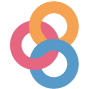)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/02b_pandas_TP.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/02b_pandas_TP.ipynb)

## Les pipe

En général, dans un projet, le nettoyage de données va consister en un ensemble de
méthodes appliquées à un `pandas.DataFrame`.
On a vu que `assign` permettait de créer une variable dans un DataFrame.
Il est également possible d'appliquer une fonction, appelée par exemple `my_udf` au
DataFrame grâce à `pipe`:
```
df = (pd.read_csv(path2data)
            .pipe(my_udf))
```

# Quelques enjeux de performance

La librairie `dask` intègre la structure de `numpy`, `pandas` et `sklearn`.
Elle a vocation à traiter de données en grande dimension, ainsi elle ne sera pas
optimale pour des données qui tiennent très bien en RAM.
Il s'agit d'une librairie construite sur la parallélisation.
Pour aller plus loin, se référer à la [documentation de `dask`](https://docs.dask.org/en/latest/).

# Références

* Le site
[pandas.pydata](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)
fait office de référence

# Annexe {#annexe}

## Téléchargement de `pynsee` avec barre de progrès

Ce code vient du [package `pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/blob/master/pynsee/download/__init__.py)...


In [ ]:
import warnings
import os
import requests
import zipfile
from pathlib import Path
from shutil import copyfile, copyfileobj

# import tqdm.auto as tqdma
from tqdm import tqdm
from tqdm.utils import CallbackIOWrapper


def download_pb(url: str, fname: str, total: int = None):
    """Useful function to get request with a progress bar
    Borrowed from https://gist.github.com/yanqd0/c13ed29e29432e3cf3e7c38467f42f51
    Arguments:
        url {str} -- URL for the source file
        fname {str} -- Destination where data will be written
    """
    resp = requests.get(url, stream=True)

    if total is None:
        total = int(resp.headers.get('content-length', 0))

    with open(fname, 'wb') as file, tqdm(
            desc='Downloading: ',
            total=total,
            unit='iB',
            unit_scale=True,
            unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)


def unzip_pb(fzip, dest, desc="Extracting"):
    """
    Useful function to unzip with progress bar
    Args:
        fzip: Filename of the zipped file
        dest: Destination where data must be written
        desc: Argument inherited from zipfile.ZipFile
    Returns:
        zipfile.Zipfile(fzip).extractall(dest) with progress
    """

    dest = Path(dest).expanduser()
    Path(dest).mkdir(parents=True, exist_ok=True)

    with zipfile.ZipFile(fzip) as zipf, tqdm(
            desc=desc, unit="B", unit_scale=True, unit_divisor=1024,
            total=sum(getattr(i, "file_size", 0) for i in zipf.infolist()),
    ) as pbar:
        for i in zipf.infolist():
            if not getattr(i, "file_size", 0):  # directory
                zipf.extract(i, os.fspath(dest))
            else:
                with zipf.open(i) as fi, open(os.fspath(dest / i.filename), "wb") as fo:
                    copyfileobj(CallbackIOWrapper(pbar.update, fi), fo)


download_pb('https://github.com/InseeFrLab/Py-Insee-Data/archive/refs/heads/master.zip', 'pynsee.zip')

unzip_pb("pynsee.zip", "pynsee")